                                  Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration for clean output
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully.")

Libraries imported successfully.


                                      Data Loading and preprocessing

In [2]:
# Load the dataset
file_path = r'C:\Users\Saket Dixit\Downloads\Agro Sentinel\data\merge\agro_sentinel_consolidated.csv'
df = pd.read_csv(file_path)

# Convert 'Date' to datetime objects (Handling format dd-mm-yyyy)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Sort by Date and State for logical ordering
df = df.sort_values(by=['Date', 'States/Uts']).reset_index(drop=True)

# Preview the data
print(f"Dataset Shape: {df.shape}")
print("Column Types:")
print(df.dtypes.value_counts())
df.head()

Dataset Shape: (4687, 24)
Column Types:
float64           22
datetime64[ns]     1
object             1
Name: count, dtype: int64


,Date,States/Uts,Rice,Wheat,Atta(Wheat),Gram Dal,Tur/Arhar Dal,Urad Dal,Moong Dal,Masoor Daal,Sugar,Milk,Groundnut Oil(Packed),Mustard Oil(Packed),Vanaspati(Packed),Soya Oil(Packed),Sunflower Oil(Packed),Palm Oil(Packed),Gur,Tea Loose,Salt Pack(Iodised),Potato,Onion,Tomato
0,2025-07-09,Arunachal pradesh,42.50,45.00,45.50,96.00,139.00,130.75,119.00,95.25,54.25,74.75,176.00,198.00,153.67,162.25,169.00,NaN,85.50,355.00,17.75,30.50,39.25,53.75
1,2025-07-09,Assam,39.11,36.07,39.41,86.81,121.93,103.27,109.96,88.11,47.96,72.04,186.50,181.52,160.28,150.85,172.64,141.06,61.19,252.19,11.59,21.07,30.11,42.50
2,2025-07-09,Bihar,37.22,28.49,34.14,80.97,118.14,113.11,108.11,79.59,45.84,56.84,199.53,173.67,154.22,154.57,169.31,128.87,48.51,274.70,24.65,20.11,24.54,38.25
3,2025-07-09,Chandigarh,42.00,33.00,39.00,86.00,125.00,116.00,111.00,88.00,46.00,59.00,211.00,189.00,169.00,163.00,176.00,147.00,55.00,270.00,28.00,22.00,30.00,40.00
4,2025-07-09,Chhattisgarh,39.14,34.29,38.29,89.71,118.00,108.57,108.57,87.00,43.71,57.57,197.00,167.71,153.43,151.14,161.14,141.33,52.14,235.57,20.86,28.29,27.86,31.86


                                          Missing val

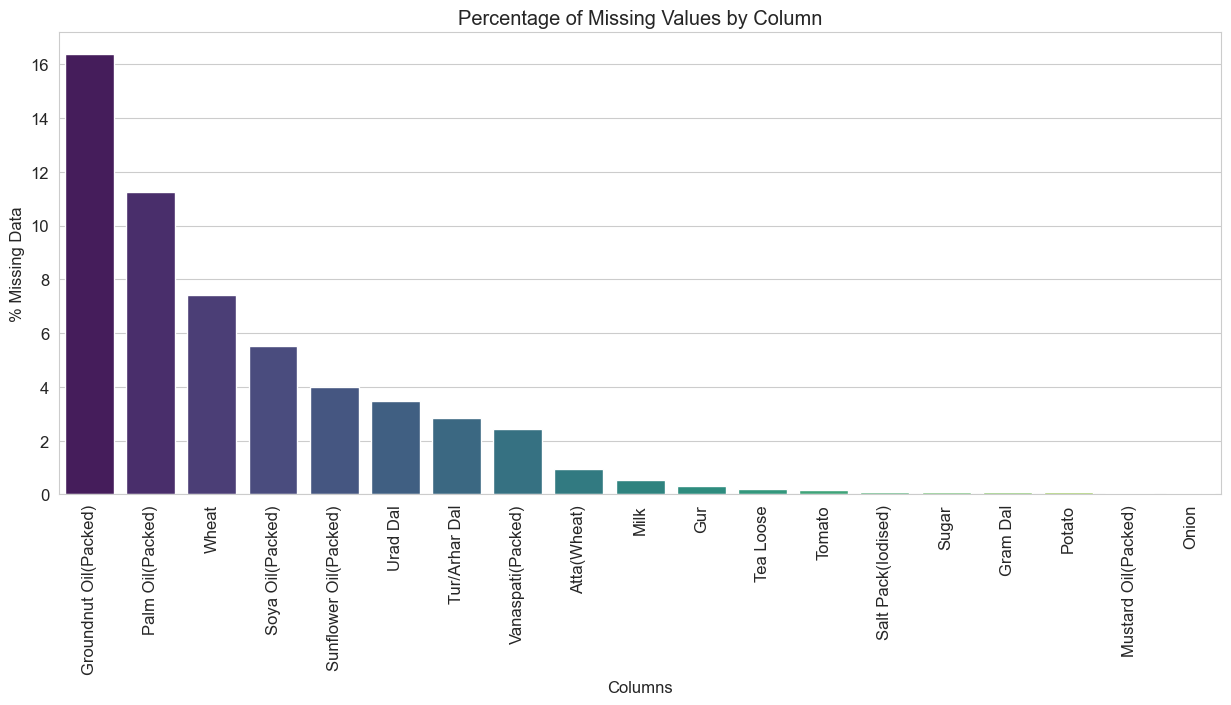

Top 5 Columns with missing data:
                       % Missing
Groundnut Oil(Packed)  16.364412
Palm Oil(Packed)       11.265202
Wheat                   7.403456
Soya Oil(Packed)        5.504587
Sunflower Oil(Packed)   3.989759


In [3]:
# 1. Calculate percentage of missing values per column
missing_percentage = df.isnull().mean() * 100
missing_df = pd.DataFrame(missing_percentage, columns=['% Missing']).sort_values(by='% Missing', ascending=False)

# Filter out columns with 0% missing to keep the plot clean
missing_df = missing_df[missing_df['% Missing'] > 0]

# 2. Visualize with a Bar Plot
plt.figure(figsize=(15, 6))
sns.barplot(x=missing_df.index, y=missing_df['% Missing'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('% Missing Data')
plt.xlabel('Columns')
plt.show()

print("Top 5 Columns with missing data:")
print(missing_df.head(5))

                          Handling of Missing val

In [4]:
# 1. Forward Fill within each State (Temporal consistency)
# If yesterday's price exists for that state, use it.
df_clean = df.groupby('States/Uts').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)

# 2. Fill remaining gaps with National Median (Fallback)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean.groupby('States/Uts')[col].transform('median'))
    if df_clean[col].isnull().any():
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
print(f"Missing values after imputation: {df_clean.isnull().sum().sum()}")
df.head(40)

Missing values after imputation: 0


,Date,States/Uts,Rice,Wheat,Atta(Wheat),Gram Dal,Tur/Arhar Dal,Urad Dal,Moong Dal,Masoor Daal,Sugar,Milk,Groundnut Oil(Packed),Mustard Oil(Packed),Vanaspati(Packed),Soya Oil(Packed),Sunflower Oil(Packed),Palm Oil(Packed),Gur,Tea Loose,Salt Pack(Iodised),Potato,Onion,Tomato
0,2025-07-09,Arunachal pradesh,42.50,45.00,45.50,96.00,139.00,130.75,119.00,95.25,54.25,74.75,176.00,198.00,153.67,162.25,169.00,NaN,85.50,355.00,17.75,30.50,39.25,53.75
1,2025-07-09,Assam,39.11,36.07,39.41,86.81,121.93,103.27,109.96,88.11,47.96,72.04,186.50,181.52,160.28,150.85,172.64,141.06,61.19,252.19,11.59,21.07,30.11,42.50
2,2025-07-09,Bihar,37.22,28.49,34.14,80.97,118.14,113.11,108.11,79.59,45.84,56.84,199.53,173.67,154.22,154.57,169.31,128.87,48.51,274.70,24.65,20.11,24.54,38.25
3,2025-07-09,Chandigarh,42.00,33.00,39.00,86.00,125.00,116.00,111.00,88.00,46.00,59.00,211.00,189.00,169.00,163.00,176.00,147.00,55.00,270.00,28.00,22.00,30.00,40.00
4,2025-07-09,Chhattisgarh,39.14,34.29,38.29,89.71,118.00,108.57,108.57,87.00,43.71,57.57,197.00,167.71,153.43,151.14,161.14,141.33,52.14,235.57,20.86,28.29,27.86,31.86
5,2025-07-09,DNH and DD,53.00,39.00,44.00,88.33,131.33,130.33,123.67,92.33,44.33,67.00,185.67,191.67,182.67,172.00,178.67,134.33,63.67,286.67,29.33,22.67,28.33,47.33
6,2025-07-09,Delhi,38.00,31.00,34.00,87.00,128.00,122.00,117.00,90.00,45.00,57.00,203.00,185.00,166.00,156.00,177.00,143.00,62.00,257.00,27.00,25.00,33.00,53.00
7,2025-07-09,Goa,56.00,48.00,49.50,99.00,127.50,135.00,125.00,99.00,45.00,60.00,230.50,189.50,203.50,170.50,166.50,124.50,58.50,331.00,27.50,37.00,35.00,37.00
8,2025-07-09,Gujarat,34.33,33.00,34.42,90.50,116.33,115.67,103.08,89.00,43.00,64.92,166.92,160.58,137.33,151.42,157.92,141.33,53.83,205.17,18.75,29.08,28.67,31.17
9,2025-07-09,Haryana,39.00,27.75,34.00,84.50,145.75,117.75,115.50,85.75,44.75,62.50,204.25,159.50,146.50,140.00,157.75,120.25,52.00,240.25,26.25,21.00,30.00,37.00


                                   Statistical Summary

In [5]:
# Summary statistics for numerical columns
desc_stats = df_clean.describe().T
desc_stats['iqr'] = desc_stats['75%'] - desc_stats['25%'] # Interquartile Range
desc_stats

,count,mean,min,25%,50%,75%,max,std,iqr
Date,4687,2025-09-23 10:11:23.592916736,2025-07-09 00:00:00,2025-08-16 00:00:00,2025-09-24 00:00:00,2025-11-01 00:00:00,2025-12-09 00:00:00,NaN,77 days 00:00:00
Rice,4687.0,43.547922,33.0,39.0,42.0,47.89,60.0,5.798848,8.89
Wheat,4687.0,36.539243,27.0,31.4,36.0,41.18,50.5,6.142925,9.78
Atta(Wheat),4687.0,41.224698,31.0,35.03,40.25,44.79,66.0,6.491508,9.76
Gram Dal,4687.0,90.73134,70.0,85.0,88.05,94.0,140.0,9.272757,9.0
Tur/Arhar Dal,4687.0,123.732803,98.0,113.81,119.0,128.865,190.0,15.475596,15.055
Urad Dal,4687.0,119.311619,98.0,113.28,117.25,125.5,170.0,9.706996,12.22
Moong Dal,4687.0,113.910969,96.67,108.0,113.33,119.0,143.0,8.03476,11.0
Masoor Daal,4687.0,92.801649,78.0,87.11,90.76,96.5,130.0,9.27252,9.39
Sugar,4687.0,47.415938,38.0,45.0,46.12,49.57,60.0,3.572203,4.57


                                 Outlier Detection and handling

Outliers handled using IQR Capping.


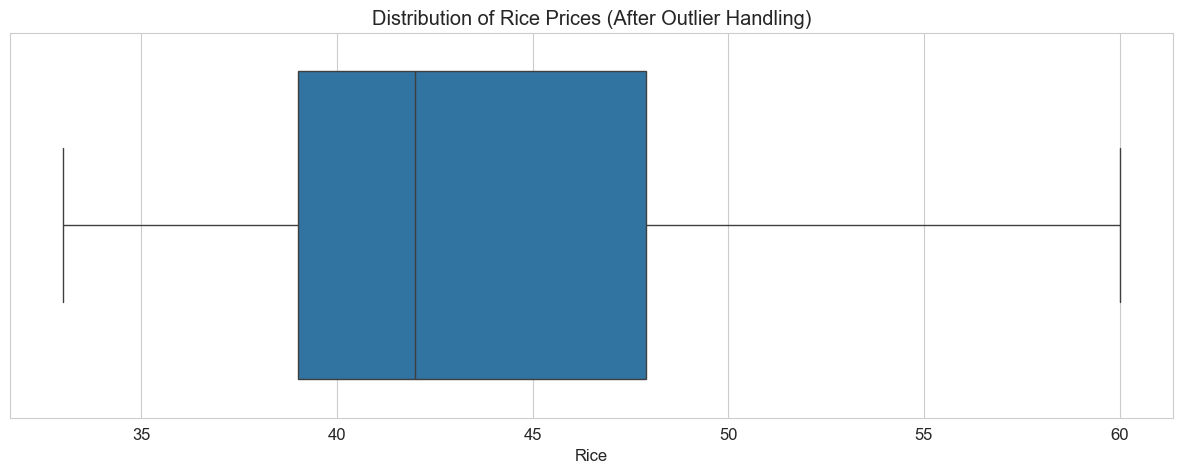

In [6]:
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    data[f'{column}_is_high'] = (data[column] > upper_bound).astype(int)
    data[f'{column}_is_low'] = (data[column] < lower_bound).astype(int)
    return data

# Apply to all numeric columns
for col in numeric_cols:
    df_clean = handle_outliers(df_clean, col)

print("Outliers handled using IQR Capping.")

# Boxplot to verify cleaning for a key commodity
plt.figure(figsize=(15, 5))
sns.boxplot(x=df_clean['Rice'])
plt.title('Distribution of Rice Prices (After Outlier Handling)')
plt.show()

                           Price Distribution of Essential Items

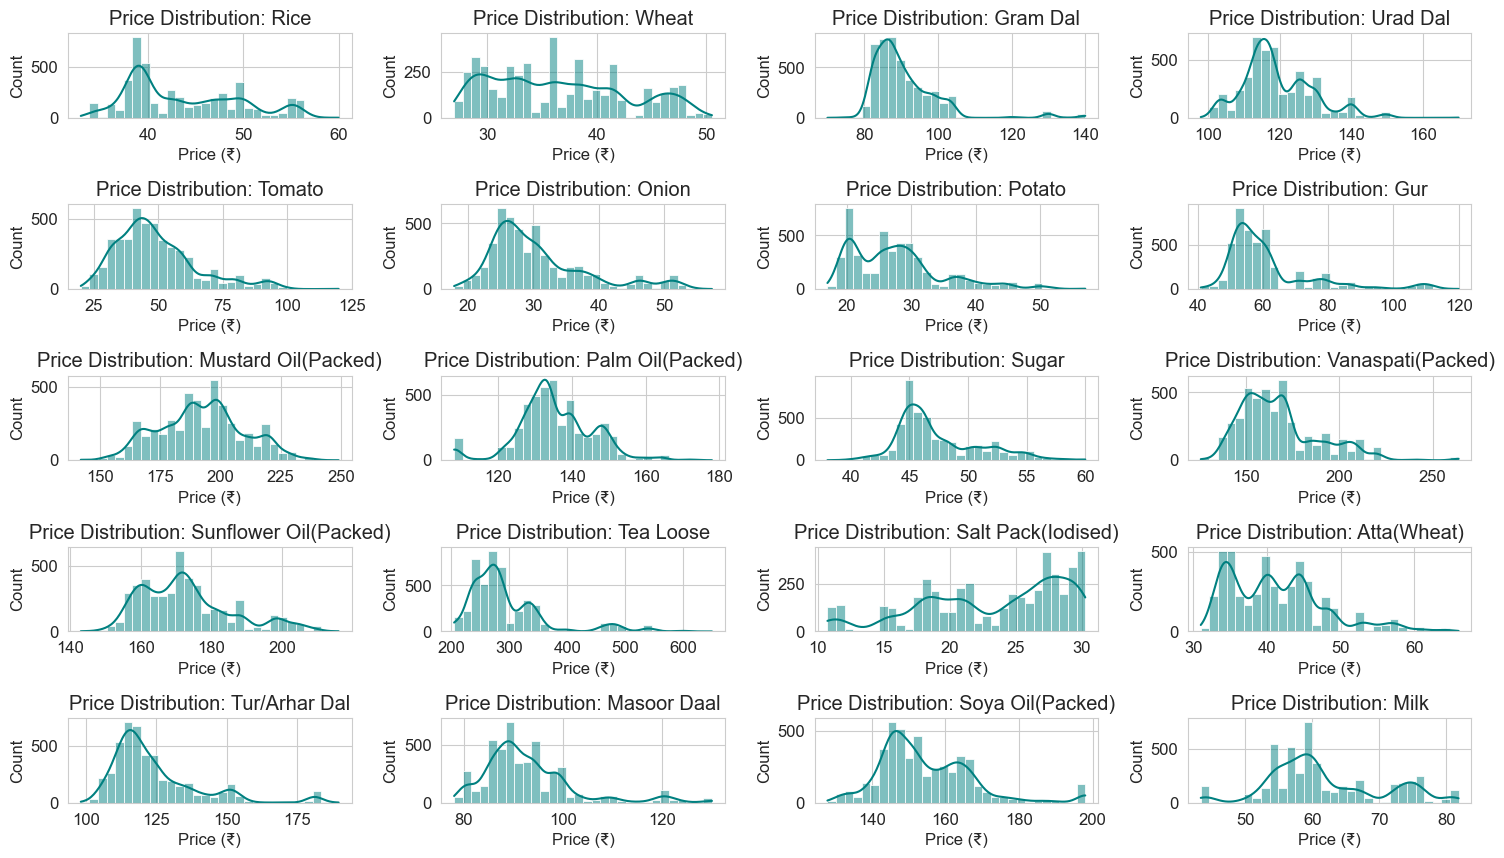

In [7]:
commodities = ['Rice', 'Wheat','Gram Dal','Urad Dal', 'Tomato', 'Onion','Potato','Gur','Mustard Oil(Packed)','Palm Oil(Packed)','Sugar','Vanaspati(Packed)','Sunflower Oil(Packed)','Tea Loose','Salt Pack(Iodised)','Atta(Wheat)','Tur/Arhar Dal','Masoor Daal','Soya Oil(Packed)','Milk',]

plt.figure(figsize=(15, 10))
for i, crop in enumerate(commodities, 1):
    plt.subplot(6, 4, i)
    sns.histplot(df_clean[crop], kde=True, color='teal', bins=30)
    plt.title(f'Price Distribution: {crop}')
    plt.xlabel('Price (₹)')
plt.tight_layout()
plt.show()

                                    Time Series Analysis (Inflation analysis)

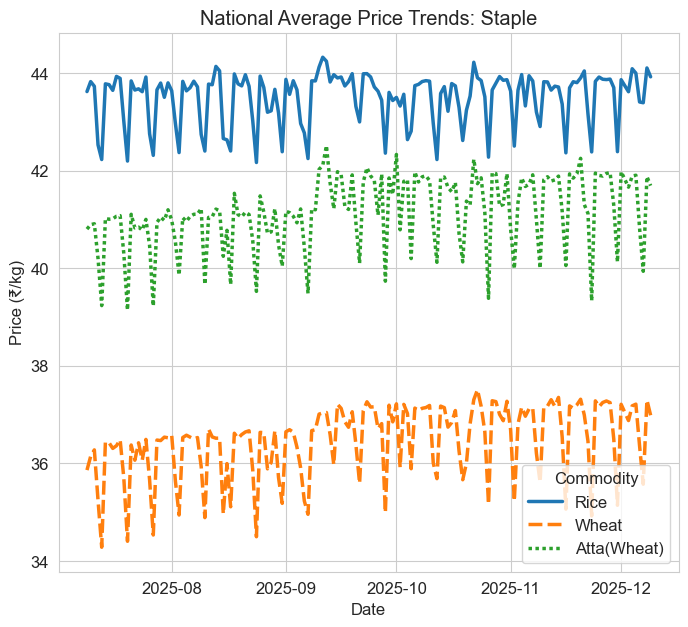

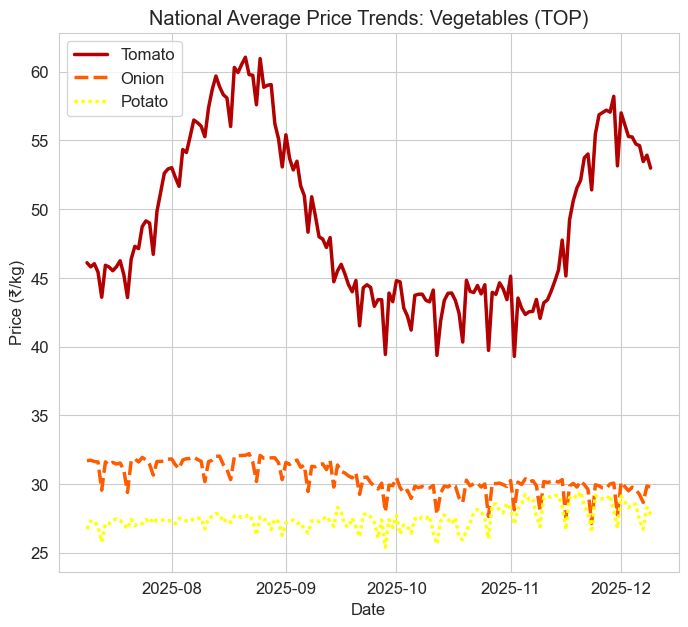

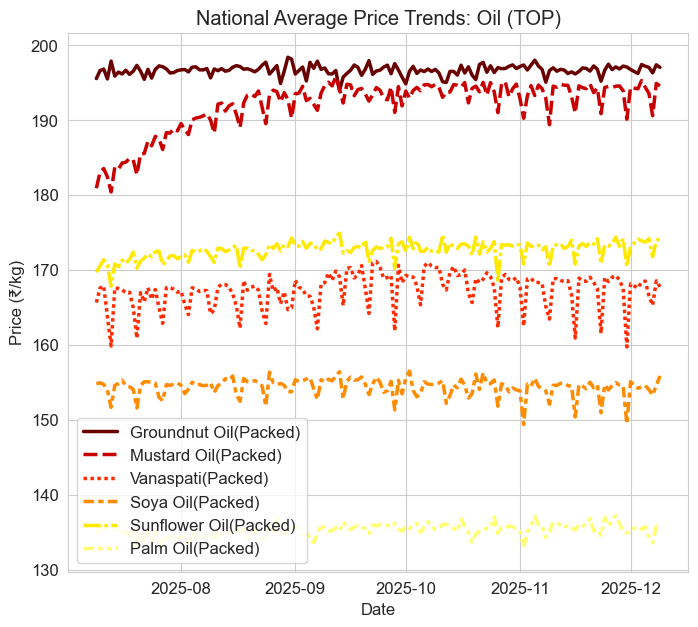

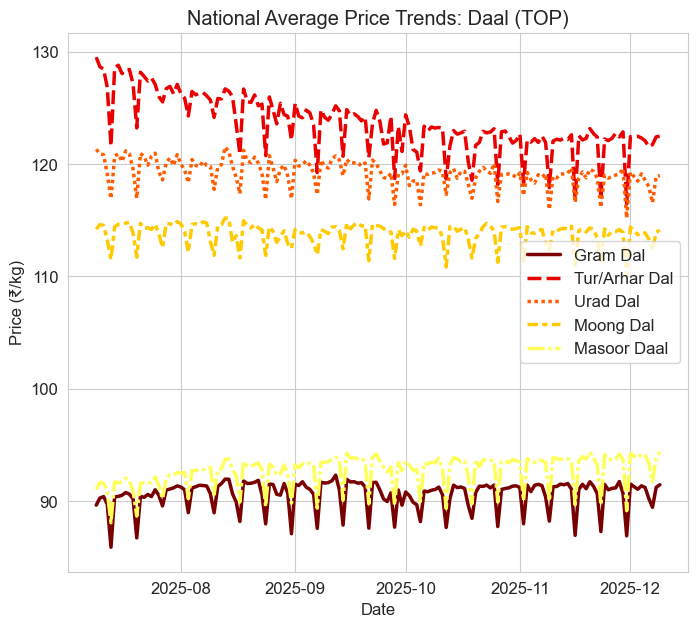

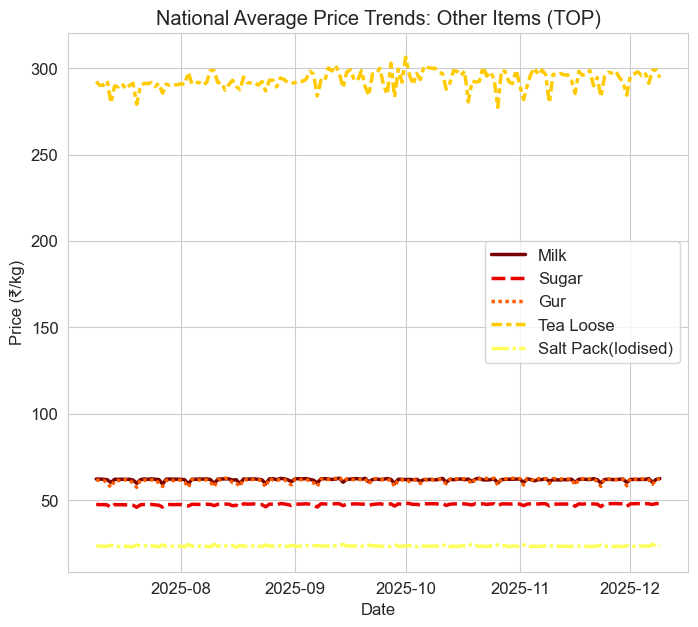

In [8]:
# Resample to daily average across all states
daily_avg = df_clean.groupby('Date')[numeric_cols].mean()

plt.figure(figsize=(8, 7))
sns.lineplot(data=daily_avg[['Rice', 'Wheat', 'Atta(Wheat)']], linewidth=2.5)
plt.title('National Average Price Trends: Staple')
plt.ylabel('Price (₹/kg)')
plt.xlabel('Date')
plt.legend(title='Commodity')
plt.show()

# Plot Volatile Vegetables separately
plt.figure(figsize=(8, 7))
sns.lineplot(data=daily_avg[['Tomato', 'Onion', 'Potato']], linewidth=2.5, palette='hot')
plt.title('National Average Price Trends: Vegetables (TOP)')
plt.ylabel('Price (₹/kg)')
plt.show()

plt.figure(figsize=(8, 7))
sns.lineplot(data=daily_avg[['Groundnut Oil(Packed)','Mustard Oil(Packed)','Vanaspati(Packed)','Soya Oil(Packed)','Sunflower Oil(Packed)','Palm Oil(Packed)']], linewidth=2.5, palette='hot')
plt.title('National Average Price Trends: Oil (TOP)')
plt.ylabel('Price (₹/kg)')
plt.show()

plt.figure(figsize=(8, 7))
sns.lineplot(data=daily_avg[['Gram Dal','Tur/Arhar Dal','Urad Dal','Moong Dal','Masoor Daal']], linewidth=2.5, palette='hot')
plt.title('National Average Price Trends: Daal (TOP)')
plt.ylabel('Price (₹/kg)')
plt.show()

plt.figure(figsize=(8, 7))
sns.lineplot(data=daily_avg[['Milk','Sugar','Gur','Tea Loose','Salt Pack(Iodised)']], linewidth=2.5, palette='hot')
plt.title('National Average Price Trends: Other Items (TOP)')
plt.ylabel('Price (₹/kg)')
plt.show()

                                  State-vise Comparison

          We are going to find which state is expensive for Thali.

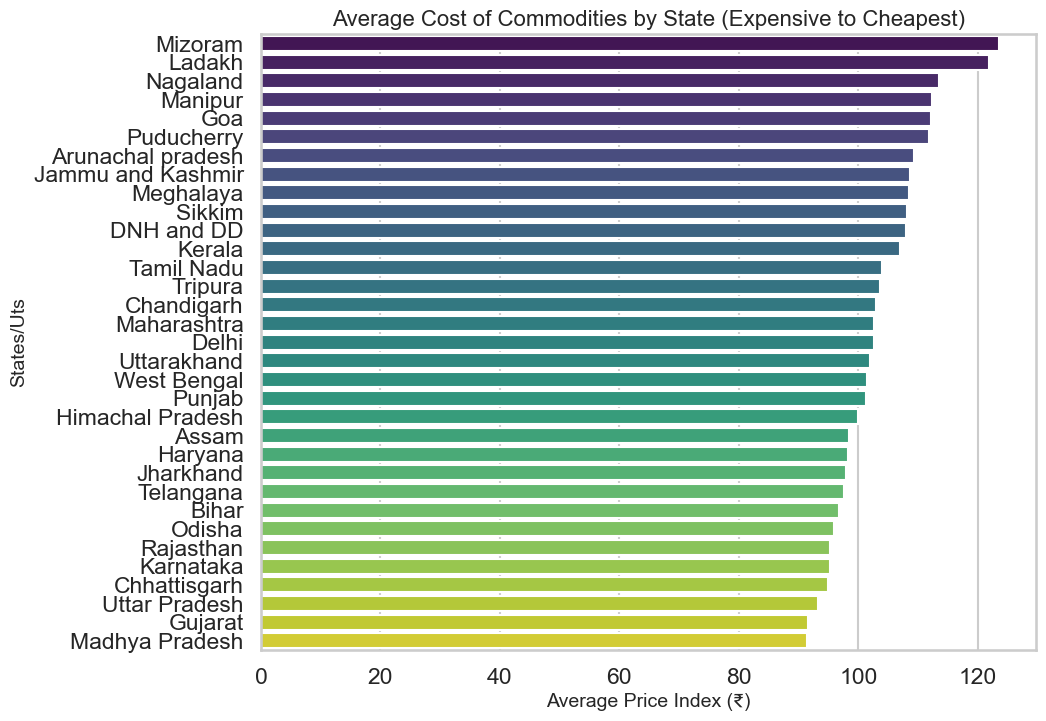

In [51]:
# Calculate average price of all commodities per state
state_avg = df_clean.groupby('States/Uts')[numeric_cols].mean().mean(axis=1).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=state_avg.values, y=state_avg.index, palette='viridis')
plt.title('Average Cost of Commodities by State (Expensive to Cheapest)')
plt.xlabel('Average Price Index (₹)')
plt.show()

                                    Seasonality Analysis(Monthly Trends)

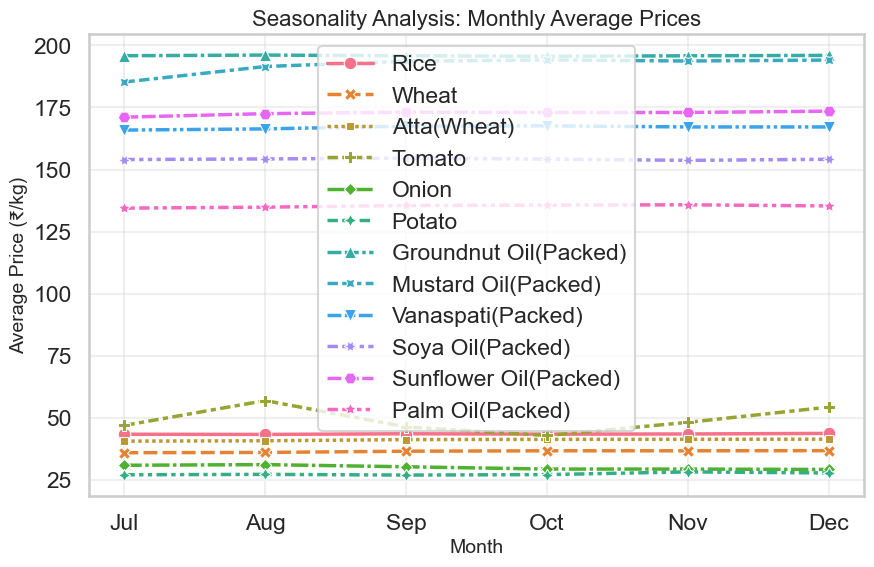

In [57]:
# Extract Month
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Month_Name'] = df_clean['Date'].dt.strftime('%b')

# Group by Month and calculate average
monthly_seasonality = df_clean.groupby('Month')[['Rice', 'Wheat', 'Atta(Wheat)','Tomato', 'Onion', 'Potato','Groundnut Oil(Packed)','Mustard Oil(Packed)','Vanaspati(Packed)','Soya Oil(Packed)','Sunflower Oil(Packed)','Palm Oil(Packed)']].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_seasonality, markers=True, linewidth=2.5)
plt.title('Seasonality Analysis: Monthly Average Prices')
plt.xticks(range(7, 13), ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Price (₹/kg)')
plt.grid(True, alpha=0.3)
plt.show()

                                                           Volatility Analysis(Coefficient of variation)

        We are finding which commodity is riskiest. We calculate Coefficient of variation (CV) = σ/µ

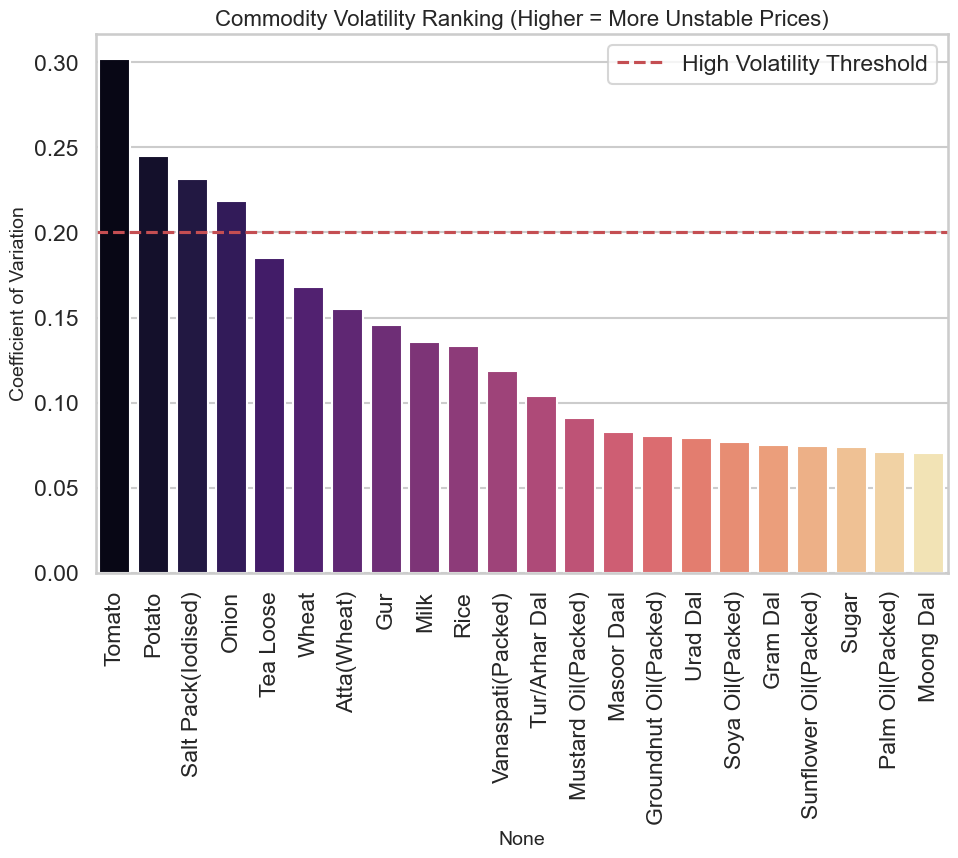

Top 5 Most Volatile Commodities:
Tomato                0.301719
Potato                0.245211
Salt Pack(Iodised)    0.231417
Onion                 0.218679
Tea Loose             0.184972
dtype: float64


In [59]:
# Calculate Volatility (Std Dev / Mean)
volatility = df_clean[numeric_cols].std() / df_clean[numeric_cols].mean()
volatility = volatility.sort_values(ascending=False)

plt.figure(figsize=(11, 7))
sns.barplot(x=volatility.index, y=volatility.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Commodity Volatility Ranking (Higher = More Unstable Prices)')
plt.ylabel('Coefficient of Variation')
plt.axhline(y=0.2, color='r', linestyle='--', label='High Volatility Threshold')
plt.legend()
plt.show()

print("Top 5 Most Volatile Commodities:")
print(volatility.head())

                                                     Spatio-Temporal heatmap(Inflation Map)

      Price evolution across states and time simultaneously. Dark red spots high price crisis period in specific regions

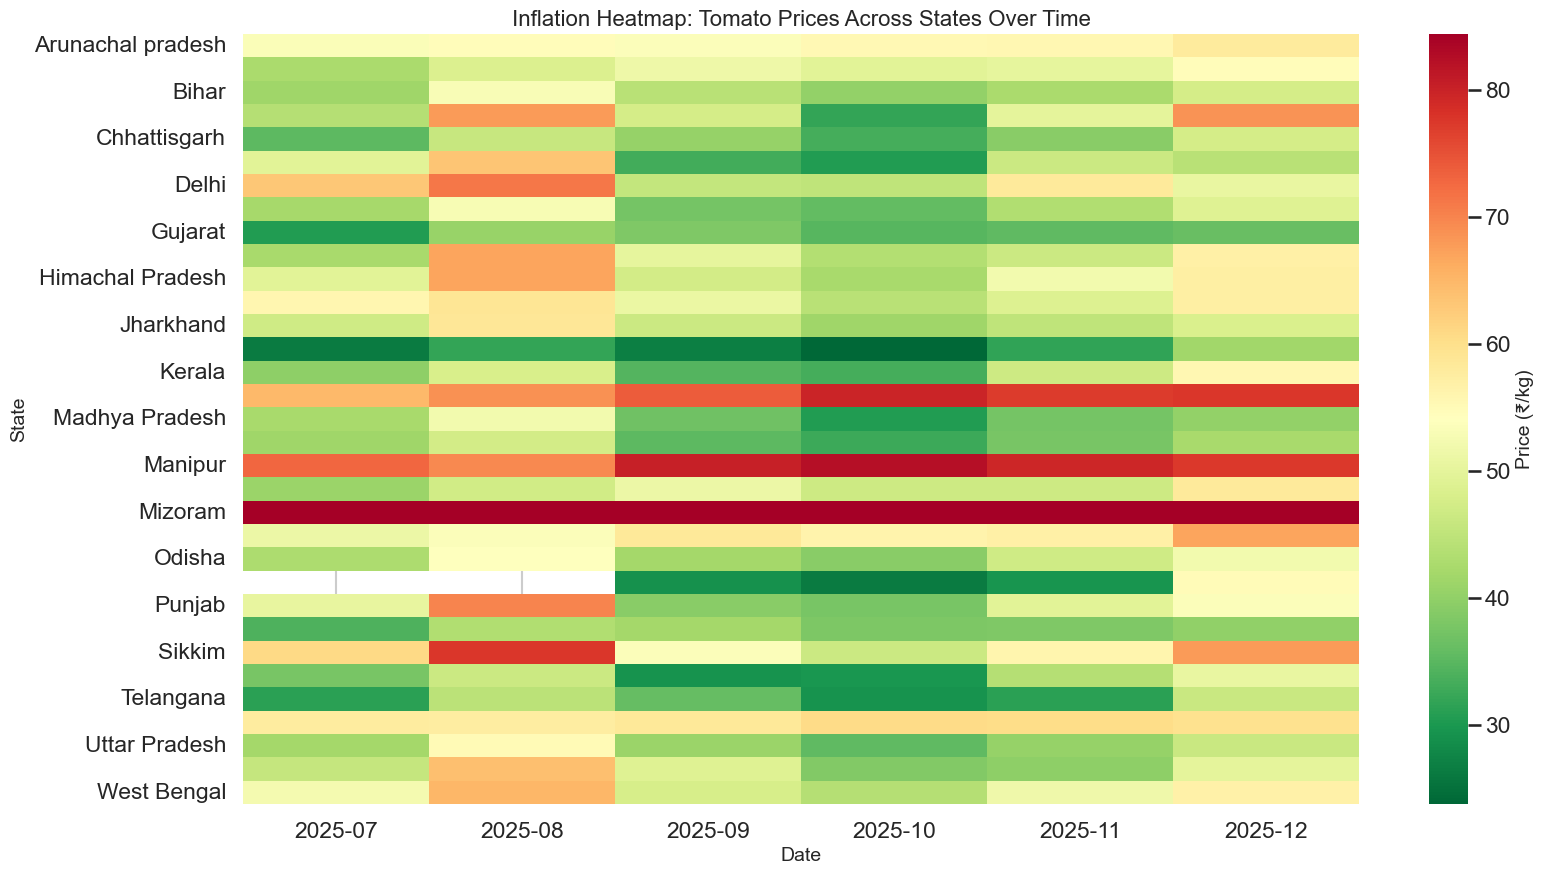

In [60]:
# Create a Year-Month column for aggregation
df_clean['YearMonth'] = df_clean['Date'].dt.to_period('M')

# Pivot the data: Rows=State, Cols=Time, Values=Price of Tomato (or any crop)
target_crop = 'Tomato'
heatmap_data = df_clean.pivot_table(index='States/Uts', columns='YearMonth', values=target_crop, aggfunc='mean')

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, cmap='RdYlGn_r', linewidths=0.0, cbar_kws={'label': 'Price (₹/kg)'})
plt.title(f'Inflation Heatmap: {target_crop} Prices Across States Over Time')
plt.xlabel('Date')
plt.ylabel('State')
plt.show()

                                           Cost of basic Thali

      Formula = 150g(Rice) + 150g(Dal) + 200g(Veg) + 20g(Oil)

Date
2025-07-09    35.148309
2025-07-10    35.222212
2025-07-11    35.180756
2025-07-12    34.677447
2025-07-13    33.668152
                ...    
2025-12-05    34.401767
2025-12-06    34.074770
2025-12-07    33.859104
2025-12-08    34.486252
2025-12-09    34.408109
Name: Thali_Cost, Length: 153, dtype: float64


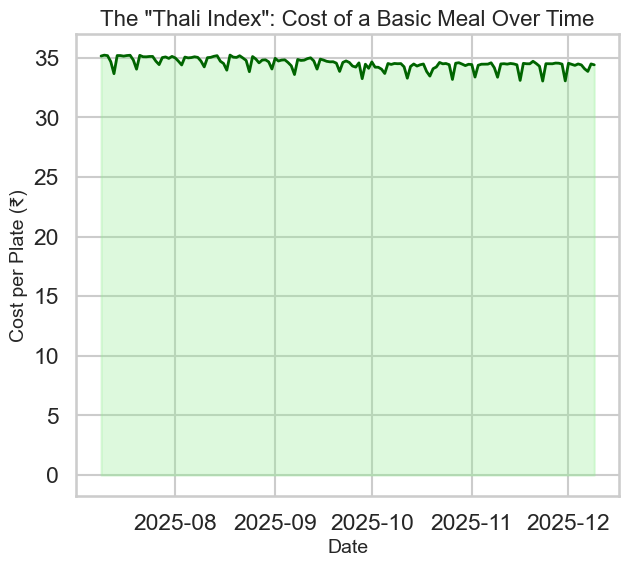

In [66]:
# Define weights (in kg)
weights = {
    'Rice': 0.15,
    'Tur/Arhar Dal': 0.15,
    'Onion': 0.1,
    'Potato': 0.1,
    'Mustard Oil(Packed)': 0.02
}

# Calculate Thali Cost per row
df_clean['Thali_Cost'] = (
    df_clean['Rice'] * weights['Rice'] +
    df_clean['Tur/Arhar Dal'] * weights['Tur/Arhar Dal'] +
    df_clean['Onion'] * weights['Onion'] +
    df_clean['Potato'] * weights['Potato'] +
    df_clean['Mustard Oil(Packed)'] * weights['Mustard Oil(Packed)']
)

# Plot National Average Thali Cost
national_thali = df_clean.groupby('Date')['Thali_Cost'].mean()
print(national_thali)

plt.figure(figsize=(7, 6))
sns.lineplot(x=national_thali.index, y=national_thali.values, color='darkgreen', linewidth=2)
plt.title('The "Thali Index": Cost of a Basic Meal Over Time')
plt.ylabel('Cost per Plate (₹)')
plt.fill_between(national_thali.index, national_thali.values, color='lightgreen', alpha=0.3)
plt.show()